In [22]:
!pip install yfinance

In [23]:
import pandas as pd
import yfinance as yf
from datetime import datetime

In [24]:
start_date = datetime.now() - pd.DateOffset(months=48)
end_date = datetime.now()

tickers = ['GOOG']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price                   Close        High         Low        Open    Volume
Ticker                   GOOG        GOOG        GOOG        GOOG      GOOG
Ticker Date                                                                
GOOG   2021-03-08  100.846153  106.059416  100.718606  104.680376  32948000
       2021-03-09  102.267548  103.530010  102.024920  103.129449  33946000
       2021-03-10  102.383636  103.378559  101.304514  103.217136  25372000
       2021-03-11  105.359932  105.904476  103.248021  103.331720  24782000
       2021-03-12  102.726891  104.138817  102.010965  103.876758  34516000


In [25]:
# Assuming 'data' is your list of stock data
df = pd.DataFrame(data)

# If your list is a list of dictionaries where each dictionary represents a stock with keys as column names and values as column values
df = pd.DataFrame.from_records(data)


<ipython-input-25-17464eeaaf2f>:5: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(data)


In [26]:
# Set Date as index if it exists
if 'Date' in df.columns:
    df.set_index('Date', inplace=True)

# Sort DataFrame by index
df.sort_index(inplace=True)


In [27]:
df.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

In [28]:
df

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2021-03-08,100.846153,106.059416,100.718606,104.680376,32948000
2021-03-09,102.267548,103.530010,102.024920,103.129449,33946000
2021-03-10,102.383636,103.378559,101.304514,103.217136,25372000
2021-03-11,105.359932,105.904476,103.248021,103.331720,24782000
2021-03-12,102.726891,104.138817,102.010965,103.876758,34516000
...,...,...,...,...,...
2025-02-28,172.220001,172.500000,168.389999,170.300003,30049800
2025-03-03,168.660004,175.000000,167.639999,173.729996,24122000


In [29]:
# Forward fill
df.ffill(inplace=True)

# Backward fill
df.bfill(inplace=True)

# Drop missing values
df.dropna(inplace=True)


In [30]:
df.isnull().sum()

,,0
Price,Ticker,
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1005 entries, 2021-03-08 to 2025-03-06
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   1005 non-null   float64
 1   (High, GOOG)    1005 non-null   float64
 2   (Low, GOOG)     1005 non-null   float64
 3   (Open, GOOG)    1005 non-null   float64
 4   (Volume, GOOG)  1005 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.1 KB


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1000x600 with 0 Axes>

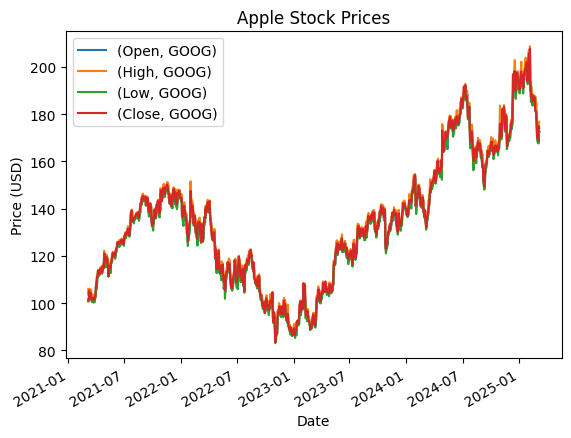

In [33]:
# Create a line plot for all price columns
plt.figure(figsize=(10, 6))
df[['Open', 'High', 'Low', 'Close']].plot()
plt.title('Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

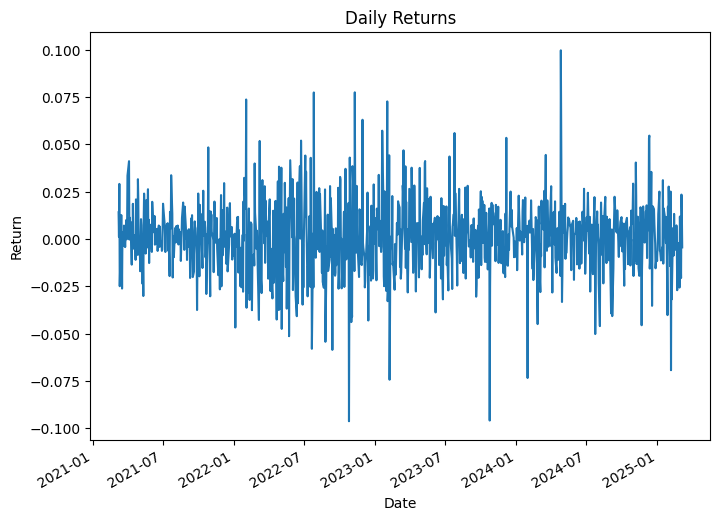

In [36]:
# Calculate and visualize the daily returns
df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(8, 6))
df['Daily Return'].plot()
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

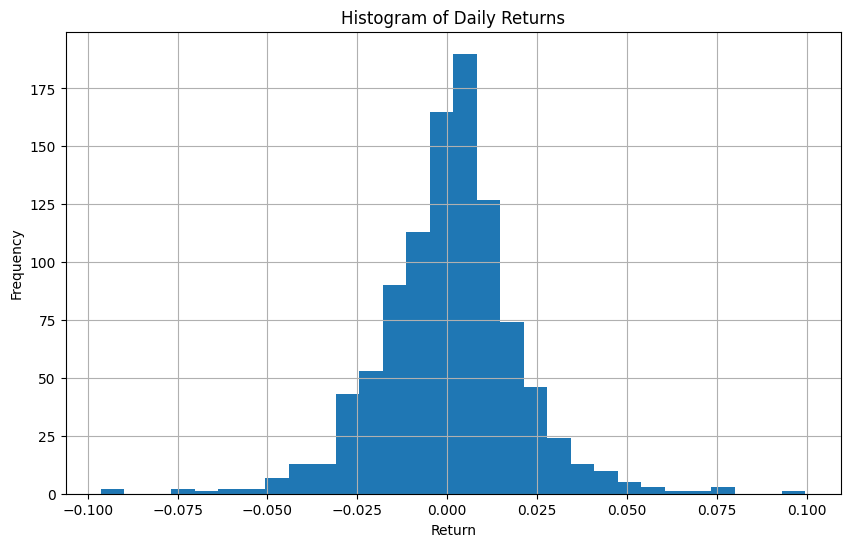

In [37]:
# Create a histogram of daily returns
plt.figure(figsize=(10, 6))
df['Daily Return'].hist(bins=30)
plt.title('Histogram of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Assuming that 'df' is your DataFrame and it has columns 'Open', 'High', 'Low', 'Volume', 'Close'
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]  # Features
y = df['Close']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [40]:
# Model Selection
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

best_model = None
best_score = -np.inf

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"{name} R-squared: {score:.4f}")

    if score > best_score:
        best_model = model
        best_score = score

print(f"\nBest model: {type(best_model).__name__} with R-squared: {best_score:.4f}")

# Evaluate the best model
y_pred = best_model.predict(X_test)
print('\nBest Model Evaluation:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))


Linear Regression R-squared: 0.9990
Ridge Regression R-squared: 0.9990
Lasso Regression R-squared: 0.9984


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.350e+01, tolerance: 6.132e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor R-squared: 0.9981
Support Vector Regression R-squared: 0.2263

Best model: LinearRegression with R-squared: 0.9990

Best Model Evaluation:
Mean Absolute Error: 0.6364659720877839
Mean Squared Error: 0.7067731347563841
Root Mean Squared Error: 0.8406980044917344
R-squared: 0.9990292819120985


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Assuming that 'df' is your DataFrame and it has columns 'Open', 'High', 'Low', 'Volume', 'Close'
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]  # Features
y = df['Close']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Regression model
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# Ensure both are 1-dimensional arrays
y_test = y_test.values.ravel()  # Convert to 1D array if necessary
y_pred = y_pred.ravel()          # Convert to 1D array if necessary

# Compare actual output values for X_test with the predicted values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))







Mean Absolute Error: 0.6364659720877839
Mean Squared Error: 0.7067731347563841
Root Mean Squared Error: 0.8406980044917344
R-squared: 0.9990292819120985


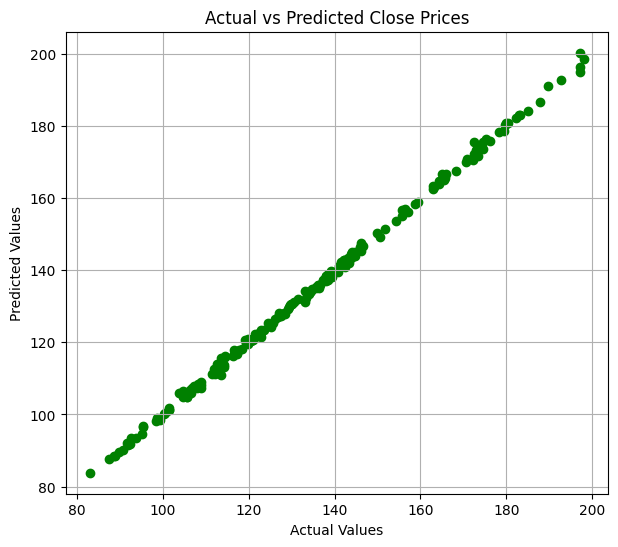

In [43]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, color ='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Close Prices')
plt.grid(True)
plt.show()


In [45]:
# Get the last row of features (today's market data)
last_row = X.tail(1)  # Ensure this matches training feature format

# Make prediction (returns numpy array)
tomorrow_price = regressor.predict(last_row)

# Convert and format output
print(f"Predicted price for tomorrow: ${float(tomorrow_price[0]):.2f}")



Predicted price for tomorrow: $175.72


<ipython-input-45-c45c5e4c9624>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted price for tomorrow: ${float(tomorrow_price[0]):.2f}")
